## IMPORTING THE LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

## Reading and Understanding the Data

In [ ]:
data = pd.read_csv("Bike Sharing Dataset.csv")

In [ ]:
# viewing the data

data.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [ ]:
# shape of data

data.shape

(730, 16)

In [ ]:
# statistical desctiption of data

data.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


In [ ]:
# info about the data type of columns and non-null count

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [ ]:
# looking for null values in dataset

data.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

There are no null values

In [ ]:
# creating a copy of original dataframe to check for duplicate data

data_duplicate = data

# Checking for duplicates and dropping the entire duplicate row if any

data_duplicate.drop_duplicates(subset=None, inplace=True)
data_duplicate.shape

(730, 16)

The shape after executing the command to drop duplicate is same as the original dataframe. So there are not any duplicate values in the dataset.

In [ ]:
# looking at instant column in the dataset, it is just a indexing of records
# so dropping instant column

data.drop(["instant"],axis=1, inplace=True)

In [ ]:
#Some columns don't have proper naming, so
#Renaming the columns

data.rename(columns = {'yr':'year','mnth':'month','atemp':'feelingtemp','hum':'humidity','cnt':'count'}, inplace = True)
data.head()

,dteday,season,year,month,holiday,weekday,workingday,weathersit,temp,feelingtemp,humidity,windspeed,casual,registered,count
0,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [ ]:
# column dteday and year & month are having same data
# so to avoid confusion, we can drop dteday column

data.drop(['dteday'],axis=1, inplace=True)

### Encoding the variables

In [ ]:
# we observe that: season, year, month, holiday, weekday, workingday, weathersit all are categorical variables
# so we will replace season, month, weekday and weathersit with appropriate values
# so mapping values for season, month, weathersit, weekday

data['season']=data.season.map({1: 'Spring', 2: 'Summer',3:'Fall', 4:'Winter' })
data['workingday']=data.workingday.map({1:'Workingday',0:'Holiday'})
data['month']=data.month.map({1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'June',7:'July',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'})
data['weathersit']=data.weathersit.map({1: 'Clear',2:'Mist + Cloudy',3:'Light Snow',4:'Snow + Fog'})
data['weekday']=data.weekday.map({0:'Sunday',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday',6:'Saturday'})

data.head()

,season,year,month,holiday,weekday,workingday,weathersit,temp,feelingtemp,humidity,windspeed,casual,registered,count
0,Spring,0,Jan,0,Monday,Workingday,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,331,654,985
1,Spring,0,Jan,0,Tuesday,Workingday,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,131,670,801
2,Spring,0,Jan,0,Wednesday,Workingday,Clear,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,Spring,0,Jan,0,Thursday,Workingday,Clear,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,Spring,0,Jan,0,Friday,Workingday,Clear,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [ ]:
# workingday column covers enough information that is required to explain holiday column
# i.e. if it is not a working day, then it is a holiday
# so holiday is a redundant variable , hence dropping it

data.drop('holiday',axis=1,inplace=True)

In [ ]:
data_1 = data.copy()

In [ ]:
# casual + registered = count
# and count is our target variable
# so casual and registered can be dropped

data.drop(['casual','registered'],axis=1,inplace=True)
data.head()

,season,year,month,weekday,workingday,weathersit,temp,feelingtemp,humidity,windspeed,count
0,Spring,0,Jan,Monday,Workingday,Mist + Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,Tuesday,Workingday,Mist + Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,Wednesday,Workingday,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,Thursday,Workingday,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,Friday,Workingday,Clear,9.305237,11.46350,43.6957,12.522300,1600


## Data Visualisation

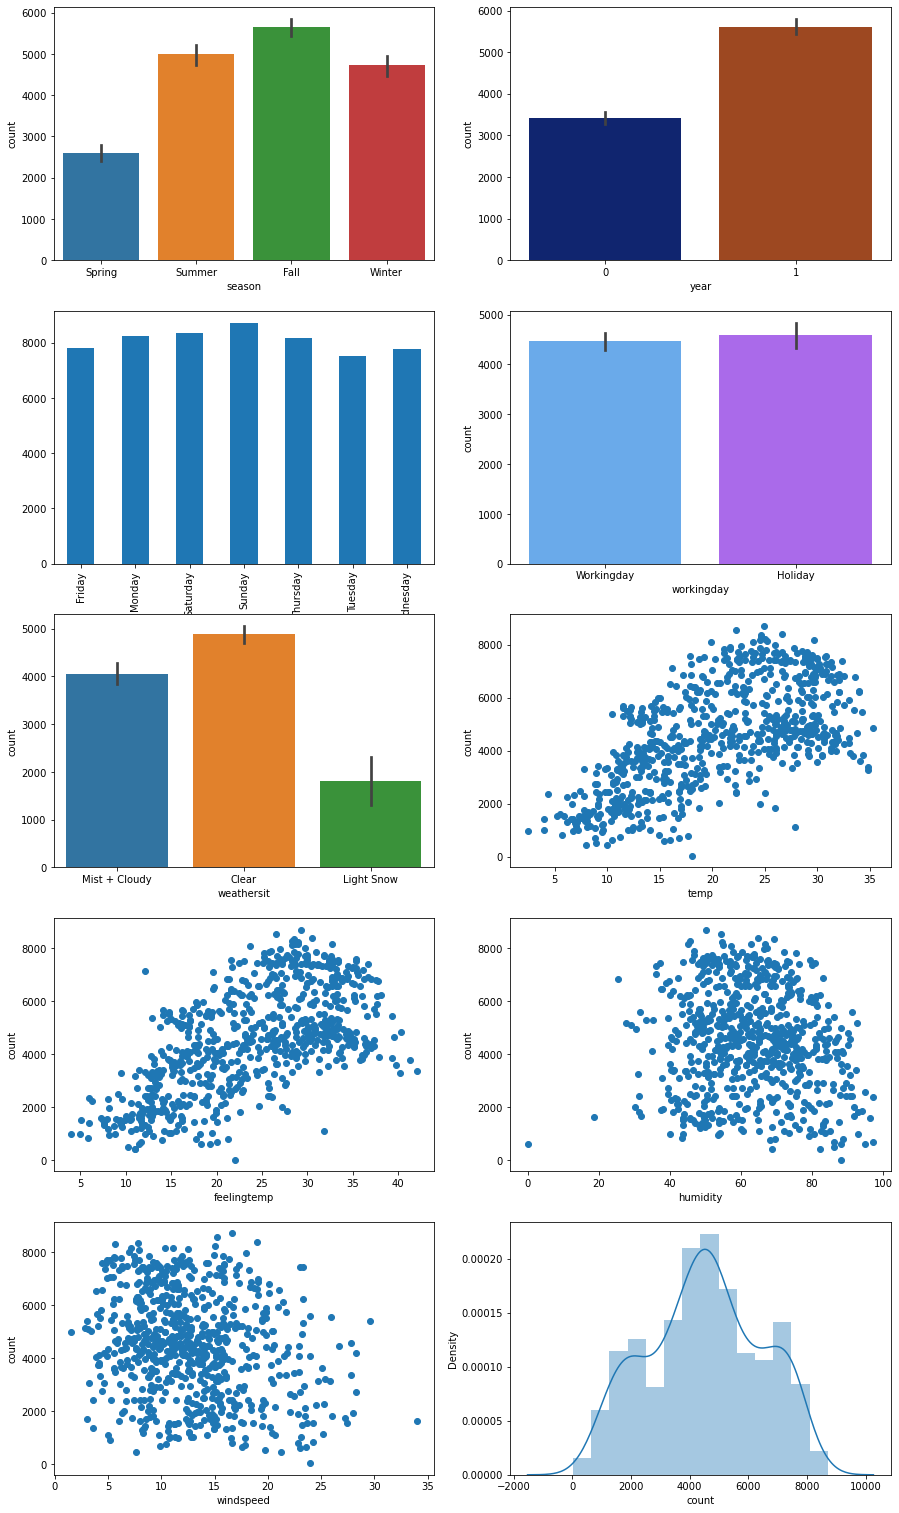

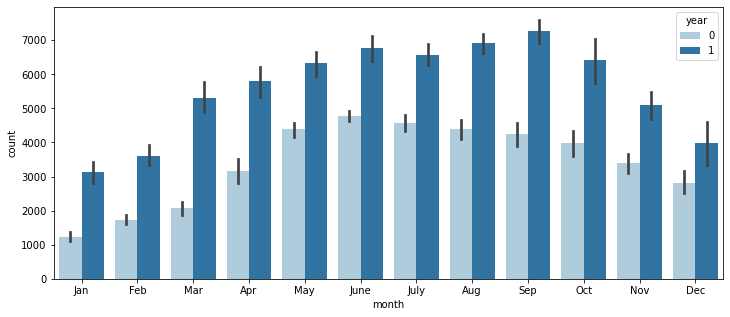

In [ ]:
plt.figure(figsize=(15, 27))
plt.subplot(5,2,1)
sns.barplot('season','count',data=data)
plt.subplot(5,2,2)
sns.barplot('year','count',data=data,palette='dark')
plt.subplot(5,2,3)
data.groupby('weekday')['count'].max().plot(kind='bar')
plt.subplot(5,2,4)
sns.barplot('workingday','count',data=data,palette='cool')
plt.subplot(5,2,5)
sns.barplot('weathersit','count',data=data)
plt.subplot(5,2,6)
plt.scatter('temp','count',data=data)
plt.xlabel('temp')
plt.ylabel('count')
plt.subplot(5,2,7)
plt.scatter('feelingtemp','count',data=data)
plt.xlabel('feelingtemp')
plt.ylabel('count')
plt.subplot(5,2,8)
plt.scatter('humidity','count',data=data)
plt.xlabel('humidity')
plt.ylabel('count')
plt.subplot(5,2,9)
plt.scatter('windspeed','count',data=data)
plt.xlabel('windspeed')
plt.ylabel('count')
plt.subplot(5,2,10)
sns.distplot(data['count'])
plt.figure(figsize=(12,5))
sns.barplot('month','count',hue='year',data=data,palette='Paired')
plt.show()

Bike Rentals are more during the Fall(Monsoon) season.

Bikes seem to be rented more in Partly cloudy weather.

Bikes seem to be rented more on working days.

Bike Rental popularity has increased in 2019 when compared to 2018.

Bike Rentals are maximum on Sunday and Monday.

Bike Rentals are observed at higher temperatures.

Temperature being directly proportional to Humidity, Bike Rentals are making during high humidity.

Wind speeds increase with a greater temperature difference.Wind speed near the surface is most highly correlated with the temperature.

Bike Rentals are lower in starting of the year but then start increasing and high.est in mid and then start decreasing towards the end of the year

In [ ]:
data.shape

(730, 11)

In [ ]:
data_1.shape

(730, 13)

### Identification of Continuous and Categorical Variables

In [ ]:
# finding unique values in the data
data.nunique().sort_values()

year             2
workingday       2
weathersit       3
season           4
weekday          7
month           12
temp           498
humidity       594
windspeed      649
feelingtemp    689
count          695
dtype: int64

### Visualisation of Numeric Variables

<Figure size 864x720 with 0 Axes>

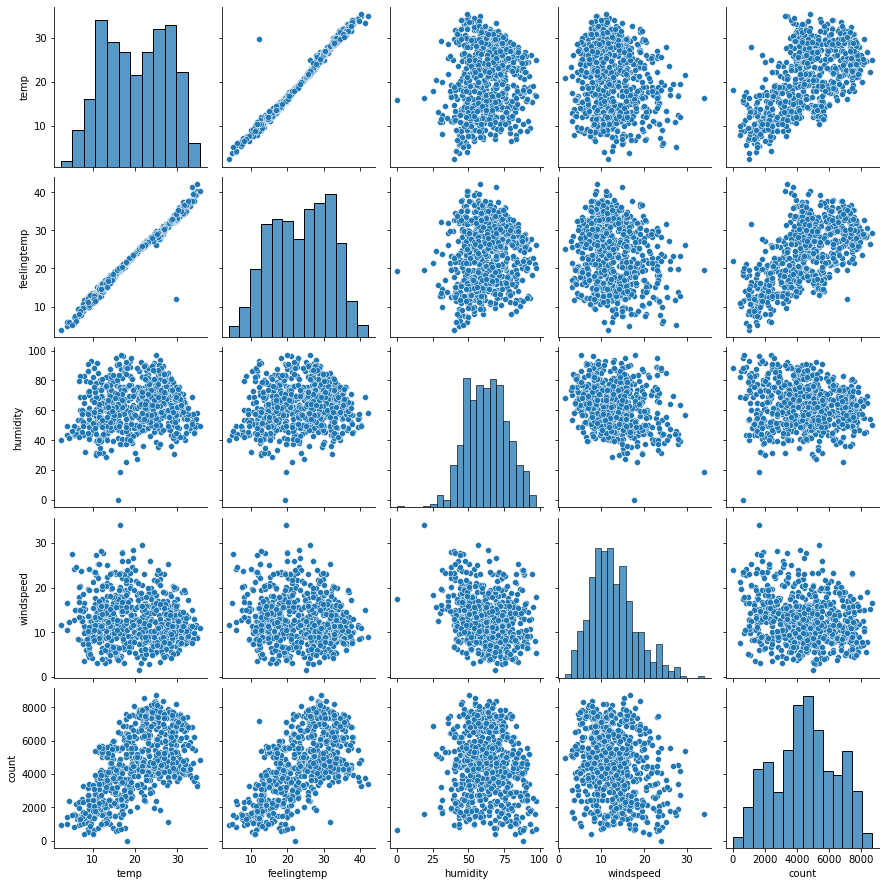

In [ ]:
# plotting a pairplot for numeric variables

plt.figure(figsize = (12, 10))
sns.pairplot(data, vars=['temp','feelingtemp','humidity','windspeed','count',])
plt.show()

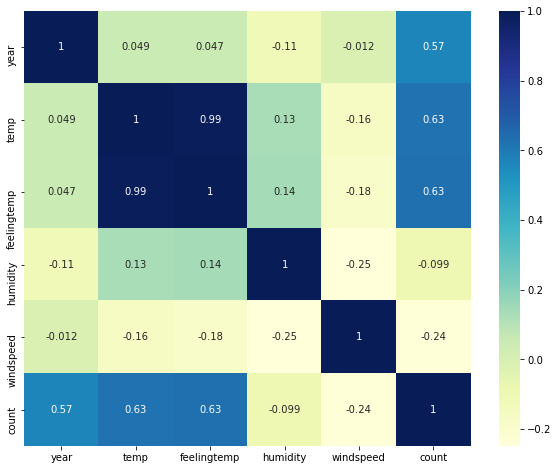

In [ ]:
#let check the correlation

plt.figure(figsize = (10, 8))
sns.heatmap(data.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [ ]:
# there is a high correlation between temp and feelingtemp i.e. 0.99 which is almost 1
# so to avoid multicollinearity dropping temp and consider feelingtemp

data.drop(['temp'],axis=1,inplace=True)
data.head()

,season,year,month,weekday,workingday,weathersit,feelingtemp,humidity,windspeed,count
0,Spring,0,Jan,Monday,Workingday,Mist + Cloudy,18.18125,80.5833,10.749882,985
1,Spring,0,Jan,Tuesday,Workingday,Mist + Cloudy,17.68695,69.6087,16.652113,801
2,Spring,0,Jan,Wednesday,Workingday,Clear,9.47025,43.7273,16.636703,1349
3,Spring,0,Jan,Thursday,Workingday,Clear,10.60610,59.0435,10.739832,1562
4,Spring,0,Jan,Friday,Workingday,Clear,11.46350,43.6957,12.522300,1600


In [ ]:
#sns.boxplot(x = 'weekday', y = 'count', data = data)

## Data Preparation

### Creating Dummy variables for categorical variables

In [ ]:
#Checking datatypes of all the columns

data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 730 entries, 0 to 729
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   season       730 non-null    object 
 1   year         730 non-null    int64  
 2   month        730 non-null    object 
 3   weekday      730 non-null    object 
 4   workingday   730 non-null    object 
 5   weathersit   730 non-null    object 
 6   feelingtemp  730 non-null    float64
 7   humidity     730 non-null    float64
 8   windspeed    730 non-null    float64
 9   count        730 non-null    int64  
dtypes: float64(3), int64(2), object(5)
memory usage: 78.9+ KB


In [ ]:
# categorical columns are having object datatype
# creating dummy variables for season, month, weekday, workingday, weathersit

season = pd.get_dummies(data['season'],drop_first=True)
workingday = pd.get_dummies(data['workingday'],drop_first=True)
weather= pd.get_dummies(data['weathersit'],drop_first=True)
month= pd.get_dummies(data['month'],drop_first=True)
weekday= pd.get_dummies(data['weekday'],drop_first=True)

In [ ]:
# adding the columns to the original dataframe

data = pd.concat([data,season,workingday,weather,month,weekday],axis=1)

In [ ]:
# Dropping the categorical variables as they have been dummy-encoded and concating them to original dataframe

data.drop(['season','workingday','weathersit','weekday','month'],axis=1,inplace=True)

In [ ]:
data.head()

,year,feelingtemp,humidity,windspeed,count,Spring,Summer,Winter,Workingday,Light Snow,...,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,18.18125,80.5833,10.749882,985,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,0,17.68695,69.6087,16.652113,801,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0,9.47025,43.7273,16.636703,1349,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,10.60610,59.0435,10.739832,1562,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,11.46350,43.6957,12.522300,1600,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
data.columns

Index(['year', 'feelingtemp', 'humidity', 'windspeed', 'count', 'Spring',
       'Summer', 'Winter', 'Workingday', 'Light Snow', 'Mist + Cloudy', 'Aug',
       'Dec', 'Feb', 'Jan', 'July', 'June', 'Mar', 'May', 'Nov', 'Oct', 'Sep',
       'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

## Splitting the Data into Training and Testing Sets

First we will perform the test-train split and scale the features and then build the model.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# 'random_state' is used so that the train and test data set always have the same rows, respectively

np.random.seed(0)
data_train, data_test = train_test_split(data, train_size = 0.7, random_state = 100)

In [ ]:
# looking at the shape of new datasets formed

print(data_train.shape)
print(data_test.shape)

(510, 28)
(220, 28)


### Rescaling The Features / Variables

    All the variables must be on the same scale for the model to be easily interpretable.
    We can use standardization or normalization (Min-Max scaling) for scaling.

So we will be performing Min-Max scaling

In [ ]:
#import the library
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler = MinMaxScaler()

In [ ]:
data.head()

,year,feelingtemp,humidity,windspeed,count,Spring,Summer,Winter,Workingday,Light Snow,...,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,18.18125,80.5833,10.749882,985,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
1,0,17.68695,69.6087,16.652113,801,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,0,9.47025,43.7273,16.636703,1349,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
3,0,10.60610,59.0435,10.739832,1562,1,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
4,0,11.46350,43.6957,12.522300,1600,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
# apply scaler() to all the columns with numeric values except the'dummy' variables

num_vars = ['feelingtemp','humidity','windspeed','count']
data_train[num_vars] = scaler.fit_transform(data_train[num_vars])

In [ ]:
data_train.head()

,year,feelingtemp,humidity,windspeed,count,Spring,Summer,Winter,Workingday,Light Snow,...,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
576,1,0.766351,0.725633,0.264686,0.827658,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
426,1,0.438975,0.640189,0.255342,0.465255,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
728,1,0.200348,0.498067,0.663106,0.204096,1,0,0,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0.391735,0.504508,0.188475,0.482973,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0
111,0,0.318819,0.751824,0.380981,0.191095,0,1,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [ ]:
# looking at the data after scaling of numeric variables
data_train.describe()

,year,feelingtemp,humidity,windspeed,count,Spring,Summer,Winter,Workingday,Light Snow,...,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,...,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.507843,0.513156,0.650480,0.320883,0.513499,0.243137,0.247059,0.247059,0.711765,0.029412,...,0.084314,0.086275,0.084314,0.080392,0.154902,0.129412,0.137255,0.143137,0.152941,0.135294
std,0.500429,0.212410,0.145846,0.169803,0.224421,0.429398,0.431725,0.431725,0.453386,0.169124,...,0.278131,0.281045,0.278131,0.272166,0.362166,0.335985,0.344454,0.350557,0.360284,0.342373
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.529718,0.653714,0.296763,0.518638,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.688457,0.754830,0.414447,0.684710,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


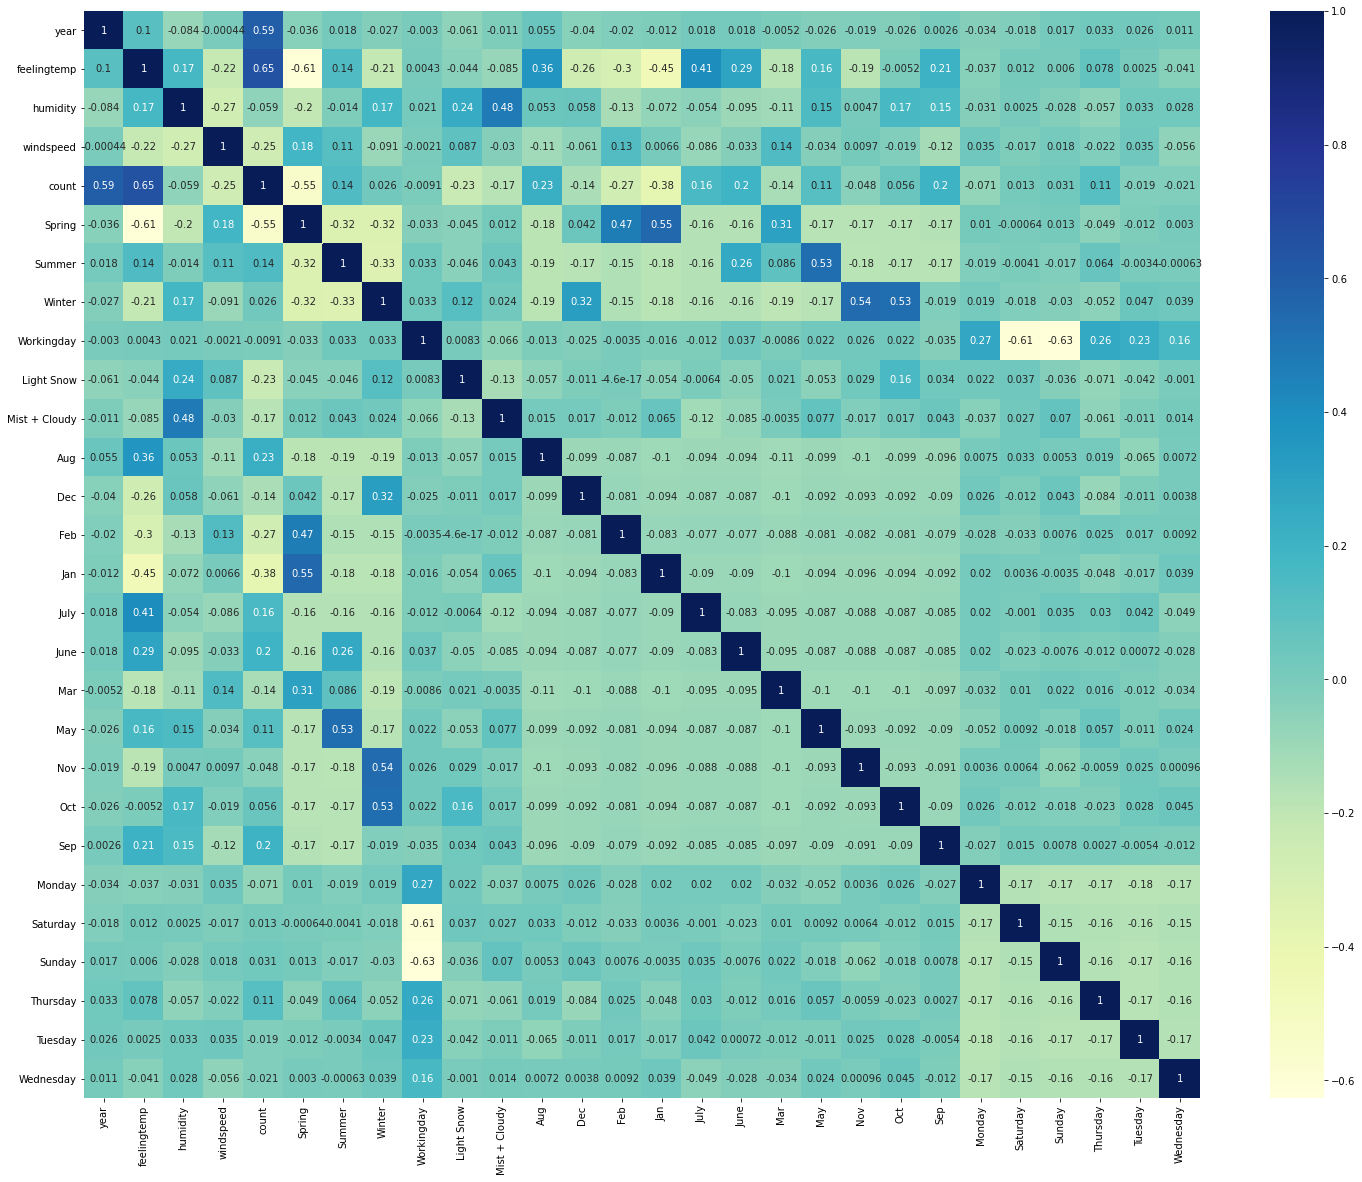

In [ ]:
# Let's check the correlation coefficients to see which variables are highly correlated after scaling
#Little to no multicollinearity among predictors

plt.figure(figsize=(25, 20))
sns.heatmap(data_train.corr(),cmap='YlGnBu',annot = True)
plt.show()

## BUILDING A LINEAR MODEL

### Dividing the data into X and Y sets for the model building

In [ ]:
# dividing the data into X and y
y_train = data_train.pop('count')
X_train = data_train

### Model Building

For automated Feature Selection, we can use Recursive feature elimination(RFE)

### RFE (Recursive Feature Elimination)

In [ ]:
# Importing LinearRegression and RFE

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [ ]:
# Running RFE with the output number of the variable equal to 15

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(lm,15)
rfe = rfe.fit(X_train, y_train)

In [ ]:
# listing the variables selected for RFE

list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('year', True, 1),
 ('feelingtemp', True, 1),
 ('humidity', True, 1),
 ('windspeed', True, 1),
 ('Spring', False, 4),
 ('Summer', True, 1),
 ('Winter', True, 1),
 ('Workingday', True, 1),
 ('Light Snow', True, 1),
 ('Mist + Cloudy', True, 1),
 ('Aug', True, 1),
 ('Dec', False, 2),
 ('Feb', True, 1),
 ('Jan', True, 1),
 ('July', False, 10),
 ('June', False, 6),
 ('Mar', False, 13),
 ('May', False, 5),
 ('Nov', False, 3),
 ('Oct', False, 11),
 ('Sep', True, 1),
 ('Monday', False, 8),
 ('Saturday', True, 1),
 ('Sunday', True, 1),
 ('Thursday', False, 12),
 ('Tuesday', False, 7),
 ('Wednesday', False, 9)]

In [ ]:
# storing the 20 variables selected for RFE in col list

col = X_train.columns[rfe.support_]
col

Index(['year', 'feelingtemp', 'humidity', 'windspeed', 'Summer', 'Winter',
       'Workingday', 'Light Snow', 'Mist + Cloudy', 'Aug', 'Feb', 'Jan', 'Sep',
       'Saturday', 'Sunday'],
      dtype='object')

In [ ]:
# checking the columns which have been eleminated

X_train.columns[~rfe.support_]

Index(['Spring', 'Dec', 'July', 'June', 'Mar', 'May', 'Nov', 'Oct', 'Monday',
       'Thursday', 'Tuesday', 'Wednesday'],
      dtype='object')

### Building model using statsmodel for detailed statistics

In [ ]:
# Creating X_train dataframe with RFE selected variables

X_train_rfe = X_train[col]

In [ ]:
import statsmodels.api as sm

### MODEL 1

In [ ]:
# Adding a constant variable

X_train_1 = sm.add_constant(X_train_rfe)

In [ ]:
# Running the linear model

lm1 = sm.OLS(y_train,X_train_1).fit()

In [ ]:
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.839
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     171.3
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          1.28e-184
Time:                        22:19:53   Log-Likelihood:                 504.16
No. Observations:                 510   AIC:                            -976.3
Df Residuals:                     494   BIC:                            -908.6
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1774      0.041      4.278      0.000       0.096       0.259
year              0.2316      0.008     28.132      0.000       0.215       0.248
feelingtemp       0.5168      0.029     17.769      0.000       0.460       0.574
humidity         -0.1651      0.038     -4.320      0.000      -0.240      -0.090
windspeed        -0.1727      0.026     -6.589      0.000      -0.224      -0.121
Summer            0.0894      0.012      7.279      0.000       0.065       0.113
Winter            0.1212      0.013      9.226      0.000       0.095       0.147
Workingday        0.0776      0.028      2.749      0.006       0.022       0.133
Light Snow       -0.2320      0.027     -8.673      0.000      -0.284      -0.179
Mist + Cloudy    -0.0554      0.011     -5.183      0.000      -0.076      -0.034
Aug               0.0632      0.017      3.831      0.000       0.031       0.096
Feb              -0.0289      0.020     -1.433      0.153      -0.068       0.011
Jan              -0.0525      0.020     -2.646      0.008      -0.091      -0.014
Sep               0.1204      0.017      7.282      0.000       0.088       0.153
Saturday          0.0941      0.030      3.129      0.002       0.035       0.153
Sunday            0.0975      0.030      3.259      0.001       0.039       0.156
==============================================================================
Omnibus:                       65.777   Durbin-Watson:                   2.042
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              153.509
Skew:                          -0.685   Prob(JB):                     4.63e-34
Kurtosis:                       5.313   Cond. No.                         26.0
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# dropping the const variable

X_train_1 = X_train_1.drop(["const"], axis = 1)

#### Creating a function to calculate VIF

To avoid writing the code again and again for VIF calculation

In [ ]:
# function for Calculation of VIF

from statsmodels.stats.outliers_influence import variance_inflation_factor

def VIF_calculation(X):
    vif = pd.DataFrame()
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [ ]:
# Calculate the VIFs for the model

VIF_calculation(X_train_1)

,Features,VIF
2,humidity,29.14
6,Workingday,18.90
1,feelingtemp,14.34
3,windspeed,4.58
14,Sunday,4.34
13,Saturday,4.15
5,Winter,2.48
8,Mist + Cloudy,2.26
4,Summer,2.24
0,year,2.07


### MODEL 2

In [ ]:
# dropping column 'Feb' as it is having HIGH P-VALUE of 0.153

X_train_2 = X_train_1.drop(["Feb"], axis = 1)

In [ ]:
# adding a const variable and running the linear model again

X_train_2= sm.add_constant(X_train_2)
lm2 = sm.OLS(y_train,X_train_2).fit()
lm2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     182.9
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          2.58e-185
Time:                        22:19:53   Log-Likelihood:                 503.10
No. Observations:                 510   AIC:                            -976.2
Df Residuals:                     495   BIC:                            -912.7
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1603      0.040      4.032      0.000       0.082       0.238
year              0.2311      0.008     28.068      0.000       0.215       0.247
feelingtemp       0.5344      0.026     20.249      0.000       0.483       0.586
humidity         -0.1671      0.038     -4.372      0.000      -0.242      -0.092
windspeed        -0.1729      0.026     -6.591      0.000      -0.224      -0.121
Summer            0.0957      0.011      8.345      0.000       0.073       0.118
Winter            0.1297      0.012     11.038      0.000       0.107       0.153
Workingday        0.0799      0.028      2.830      0.005       0.024       0.135
Light Snow       -0.2311      0.027     -8.634      0.000      -0.284      -0.178
Mist + Cloudy    -0.0553      0.011     -5.167      0.000      -0.076      -0.034
Aug               0.0664      0.016      4.053      0.000       0.034       0.099
Jan              -0.0398      0.018     -2.241      0.025      -0.075      -0.005
Sep               0.1234      0.016      7.509      0.000       0.091       0.156
Saturday          0.0970      0.030      3.227      0.001       0.038       0.156
Sunday            0.1001      0.030      3.345      0.001       0.041       0.159
==============================================================================
Omnibus:                       62.227   Durbin-Watson:                   2.038
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              145.526
Skew:                          -0.649   Prob(JB):                     2.51e-32
Kurtosis:                       5.272   Cond. No.                         25.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# dropping the const variable

X_train_2 = X_train_2.drop(["const"], axis = 1)

In [ ]:
# Calculate the VIFs for the model 2

VIF_calculation(X_train_2)

,Features,VIF
2,humidity,27.67
6,Workingday,18.19
1,feelingtemp,12.43
3,windspeed,4.49
13,Sunday,4.21
12,Saturday,4.04
8,Mist + Cloudy,2.25
0,year,2.06
5,Winter,2.05
4,Summer,1.97


### MODEL 3

In [ ]:
# dropping column 'Jan' as it is having HIGH P-VALUE of 0.025

X_train_3 = X_train_2.drop(["Jan"], axis = 1)

In [ ]:
# adding a const variable and running the linear model again

X_train_3= sm.add_constant(X_train_3)
lm3 = sm.OLS(y_train,X_train_3).fit()
lm3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.832
Method:                 Least Squares   F-statistic:                     195.1
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          2.17e-185
Time:                        22:19:53   Log-Likelihood:                 500.53
No. Observations:                 510   AIC:                            -973.1
Df Residuals:                     496   BIC:                            -913.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1401      0.039      3.603      0.000       0.064       0.216
year              0.2302      0.008     27.876      0.000       0.214       0.246
feelingtemp       0.5612      0.024     23.757      0.000       0.515       0.608
humidity         -0.1737      0.038     -4.538      0.000      -0.249      -0.098
windspeed        -0.1664      0.026     -6.355      0.000      -0.218      -0.115
Summer            0.1024      0.011      9.216      0.000       0.081       0.124
Winter            0.1402      0.011     12.953      0.000       0.119       0.161
Workingday        0.0806      0.028      2.846      0.005       0.025       0.136
Light Snow       -0.2275      0.027     -8.480      0.000      -0.280      -0.175
Mist + Cloudy    -0.0552      0.011     -5.142      0.000      -0.076      -0.034
Aug               0.0690      0.016      4.212      0.000       0.037       0.101
Sep               0.1263      0.016      7.679      0.000       0.094       0.159
Saturday          0.0976      0.030      3.235      0.001       0.038       0.157
Sunday            0.1013      0.030      3.372      0.001       0.042       0.160
==============================================================================
Omnibus:                       60.842   Durbin-Watson:                   2.031
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              145.874
Skew:                          -0.627   Prob(JB):                     2.11e-32
Kurtosis:                       5.300   Cond. No.                         25.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# dropping the const variable

X_train_3 = X_train_3.drop(["const"], axis = 1)

In [ ]:
# Calculate the VIFs for the model

VIF_calculation(X_train_3)

,Features,VIF
2,humidity,25.99
6,Workingday,17.43
1,feelingtemp,10.19
3,windspeed,4.49
12,Sunday,4.07
11,Saturday,3.89
8,Mist + Cloudy,2.24
0,year,2.04
4,Summer,1.84
5,Winter,1.74


### MODEL 4

In [ ]:
# dropping column 'humidity' as it is having HIGH VIF of 25.99

X_train_4 = X_train_3.drop(["humidity"], axis = 1)

# adding a const variable and running the linear model again

X_train_4= sm.add_constant(X_train_4)
lm4 = sm.OLS(y_train,X_train_4).fit()
lm4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.830
Model:                            OLS   Adj. R-squared:                  0.825
Method:                 Least Squares   F-statistic:                     201.6
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          3.45e-182
Time:                        22:19:54   Log-Likelihood:                 490.15
No. Observations:                 510   AIC:                            -954.3
Df Residuals:                     497   BIC:                            -899.3
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.0375      0.032      1.164      0.245      -0.026       0.101
year              0.2341      0.008     27.963      0.000       0.218       0.251
feelingtemp       0.5373      0.023     22.886      0.000       0.491       0.583
windspeed        -0.1342      0.026     -5.222      0.000      -0.185      -0.084
Summer            0.0999      0.011      8.830      0.000       0.078       0.122
Winter            0.1307      0.011     12.072      0.000       0.109       0.152
Workingday        0.0840      0.029      2.910      0.004       0.027       0.141
Light Snow       -0.2749      0.025    -10.912      0.000      -0.324      -0.225
Mist + Cloudy    -0.0832      0.009     -9.275      0.000      -0.101      -0.066
Aug               0.0675      0.017      4.042      0.000       0.035       0.100
Sep               0.1204      0.017      7.202      0.000       0.088       0.153
Saturday          0.1037      0.031      3.374      0.001       0.043       0.164
Sunday            0.1082      0.031      3.539      0.000       0.048       0.168
==============================================================================
Omnibus:                       59.353   Durbin-Watson:                   2.037
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              132.252
Skew:                          -0.636   Prob(JB):                     1.91e-29
Kurtosis:                       5.145   Cond. No.                         22.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# dropping the const variable

X_train_4 = X_train_4.drop(["const"], axis = 1)

In [ ]:
# Calculate the VIFs for the model

VIF_calculation(X_train_4)

,Features,VIF
5,Workingday,9.84
1,feelingtemp,8.76
2,windspeed,4.48
11,Sunday,2.76
10,Saturday,2.60
0,year,2.04
3,Summer,1.83
4,Winter,1.64
7,Mist + Cloudy,1.59
8,Aug,1.55


### MODEL 5

In [ ]:
# dropping column 'Workingday' as it is having HIGH VIF of 9.84

X_train_5 = X_train_4.drop(["Workingday"], axis = 1)

# adding a const variable and running the linear model again

X_train_5= sm.add_constant(X_train_5)
lm5 = sm.OLS(y_train,X_train_5).fit()
lm5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.823
Method:                 Least Squares   F-statistic:                     216.0
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          1.50e-181
Time:                        22:19:54   Log-Likelihood:                 485.85
No. Observations:                 510   AIC:                            -947.7
Df Residuals:                     498   BIC:                            -896.9
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1168      0.017      6.726      0.000       0.083       0.151
year              0.2337      0.008     27.711      0.000       0.217       0.250
feelingtemp       0.5405      0.024     22.876      0.000       0.494       0.587
windspeed        -0.1341      0.026     -5.180      0.000      -0.185      -0.083
Summer            0.1014      0.011      8.908      0.000       0.079       0.124
Winter            0.1314      0.011     12.050      0.000       0.110       0.153
Light Snow       -0.2724      0.025    -10.740      0.000      -0.322      -0.223
Mist + Cloudy    -0.0826      0.009     -9.142      0.000      -0.100      -0.065
Aug               0.0691      0.017      4.107      0.000       0.036       0.102
Sep               0.1178      0.017      7.007      0.000       0.085       0.151
Saturday          0.0220      0.013      1.744      0.082      -0.003       0.047
Sunday            0.0267      0.012      2.161      0.031       0.002       0.051
==============================================================================
Omnibus:                       65.890   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              155.448
Skew:                          -0.682   Prob(JB):                     1.76e-34
Kurtosis:                       5.335   Cond. No.                         10.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# dropping the const variable

X_train_5 = X_train_5.drop(["const"], axis = 1)

In [ ]:
# Calculate the VIFs for the model

VIF_calculation(X_train_5)

,Features,VIF
1,feelingtemp,5.02
2,windspeed,3.07
0,year,2.00
3,Summer,1.83
7,Aug,1.55
6,Mist + Cloudy,1.51
4,Winter,1.50
8,Sep,1.30
10,Sunday,1.19
9,Saturday,1.17


### MODEL 6

In [ ]:
# dropping column 'Saturday' as it is having P-VALUE of 0.082

X_train_6 = X_train_5.drop(["Saturday"], axis = 1)

In [ ]:
# adding a const variable and running the linear model again

X_train_6= sm.add_constant(X_train_6)
lm6 = sm.OLS(y_train,X_train_6).fit()
lm6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.826
Model:                            OLS   Adj. R-squared:                  0.822
Method:                 Least Squares   F-statistic:                     236.3
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          4.31e-182
Time:                        22:19:54   Log-Likelihood:                 484.29
No. Observations:                 510   AIC:                            -946.6
Df Residuals:                     499   BIC:                            -900.0
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1202      0.017      6.951      0.000       0.086       0.154
year              0.2335      0.008     27.632      0.000       0.217       0.250
feelingtemp       0.5404      0.024     22.827      0.000       0.494       0.587
windspeed        -0.1346      0.026     -5.192      0.000      -0.186      -0.084
Summer            0.1014      0.011      8.882      0.000       0.079       0.124
Winter            0.1309      0.011     11.989      0.000       0.109       0.152
Light Snow       -0.2706      0.025    -10.657      0.000      -0.321      -0.221
Mist + Cloudy    -0.0819      0.009     -9.058      0.000      -0.100      -0.064
Aug               0.0699      0.017      4.146      0.000       0.037       0.103
Sep               0.1182      0.017      7.014      0.000       0.085       0.151
Sunday            0.0234      0.012      1.909      0.057      -0.001       0.047
==============================================================================
Omnibus:                       64.436   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.971
Skew:                          -0.651   Prob(JB):                     1.83e-35
Kurtosis:                       5.415   Cond. No.                         10.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
# dropping the const variable

X_train_6 = X_train_6.drop(["const"], axis = 1)

In [ ]:
# Calculate the VIFs for the model

VIF_calculation(X_train_6)

,Features,VIF
1,feelingtemp,4.96
2,windspeed,3.05
0,year,2.00
3,Summer,1.83
7,Aug,1.55
4,Winter,1.50
6,Mist + Cloudy,1.50
8,Sep,1.30
9,Sunday,1.16
5,Light Snow,1.08


### MODEL 7

In [ ]:
# dropping column 'Sunday' as it is having P-VALUE of 0.057

X_train_7 = X_train_6.drop(["Sunday"], axis = 1)

In [ ]:
# adding a const variable and running the linear model again

X_train_7= sm.add_constant(X_train_7)
lm7 = sm.OLS(y_train,X_train_7).fit()
lm7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     260.8
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          1.58e-182
Time:                        22:19:54   Log-Likelihood:                 482.44
No. Observations:                 510   AIC:                            -944.9
Df Residuals:                     500   BIC:                            -902.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1226      0.017      7.087      0.000       0.089       0.157
year              0.2337      0.008     27.589      0.000       0.217       0.250
feelingtemp       0.5412      0.024     22.803      0.000       0.495       0.588
windspeed        -0.1334      0.026     -5.134      0.000      -0.185      -0.082
Summer            0.1005      0.011      8.791      0.000       0.078       0.123
Winter            0.1302      0.011     11.896      0.000       0.109       0.152
Light Snow       -0.2718      0.025    -10.679      0.000      -0.322      -0.222
Mist + Cloudy    -0.0807      0.009     -8.921      0.000      -0.098      -0.063
Aug               0.0694      0.017      4.104      0.000       0.036       0.103
Sep               0.1180      0.017      6.985      0.000       0.085       0.151
==============================================================================
Omnibus:                       60.370   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              154.244
Skew:                          -0.602   Prob(JB):                     3.21e-34
Kurtosis:                       5.411   Cond. No.                         10.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
X_train_7.shape

(510, 10)

In [ ]:
# Calculate the VIFs for the model

VIF_calculation(X_train_7)

,Features,VIF
0,const,16.95
2,feelingtemp,1.44
8,Aug,1.40
4,Summer,1.38
5,Winter,1.26
9,Sep,1.20
3,windspeed,1.10
6,Light Snow,1.05
7,Mist + Cloudy,1.05
1,year,1.02


In [ ]:
lm7.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  count   R-squared:                       0.824
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                     260.8
Date:                Tue, 08 Feb 2022   Prob (F-statistic):          1.58e-182
Time:                        22:19:54   Log-Likelihood:                 482.44
No. Observations:                 510   AIC:                            -944.9
Df Residuals:                     500   BIC:                            -902.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const             0.1226      0.017      7.087      0.000       0.089       0.157
year              0.2337      0.008     27.589      0.000       0.217       0.250
feelingtemp       0.5412      0.024     22.803      0.000       0.495       0.588
windspeed        -0.1334      0.026     -5.134      0.000      -0.185      -0.082
Summer            0.1005      0.011      8.791      0.000       0.078       0.123
Winter            0.1302      0.011     11.896      0.000       0.109       0.152
Light Snow       -0.2718      0.025    -10.679      0.000      -0.322      -0.222
Mist + Cloudy    -0.0807      0.009     -8.921      0.000      -0.098      -0.063
Aug               0.0694      0.017      4.104      0.000       0.036       0.103
Sep               0.1180      0.017      6.985      0.000       0.085       0.151
==============================================================================
Omnibus:                       60.370   Durbin-Watson:                   2.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              154.244
Skew:                          -0.602   Prob(JB):                     3.21e-34
Kurtosis:                       5.411   Cond. No.                         10.6
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This model with R-Squared and Adj. R-Squared value of 0.82 looks good to be selected as our final model.

VIF values and P-Values both are within the acceptance range. Also this model has Very-Low Multicollinearity between the predictor variables having significant p-values.

So, for now we will be considering this model as our final model.

## Residual Analysis of the train data

In [ ]:
# y_train predicted

y_train_pred = lm7.predict(X_train_7)

residual = y_train - y_train_pred

Text(0.5, 0, 'Errors')

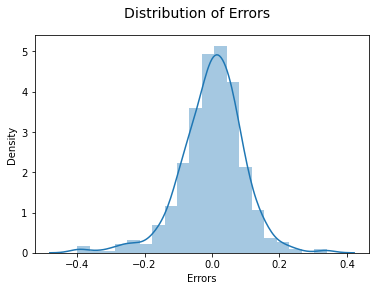

In [ ]:
fig = plt.figure()
sns.distplot(residual, bins = 20)
fig.suptitle('Distribution of Errors', fontsize = 14)
plt.xlabel('Errors')

From the plot, we can figure out that Errors or Residuals are normally distributed.

### Homoscedasticity

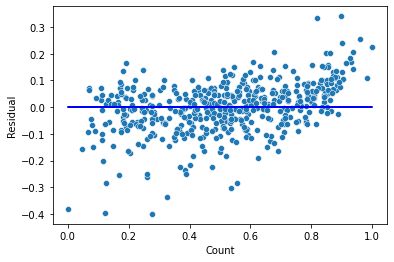

In [ ]:
sns.scatterplot(y_train,residual)
plt.plot(y_train,(y_train - y_train),'-b')
plt.xlabel('Count')
plt.ylabel('Residual')
plt.show()

Homoscedacity is maintained as no visible pattern in residual values could be seen.

### Checking the Absence of Multicolinearity

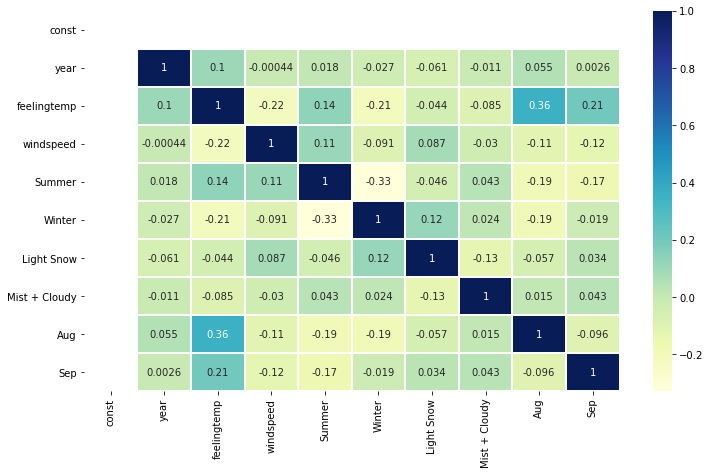

In [ ]:
# Validating if there is Multicolinearity in the train model

plt.figure(figsize=(12,7))
sns.heatmap(X_train_7.corr(),annot = True, cmap="YlGnBu",linewidth =1)
plt.show()

There is no high correlation in the model and VIF of all the features are below 5 as v calculated. So, there is no multicolinearity in the final model.

### Linear Relationship between some variables

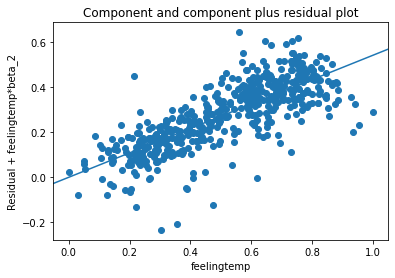

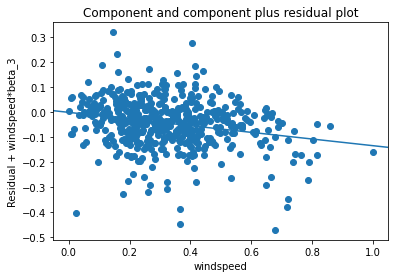

In [ ]:
sm.graphics.plot_ccpr(lm7, 'feelingtemp')
sm.graphics.plot_ccpr(lm7, 'windspeed')
plt.show()

### Plotting a Q-Q Plot

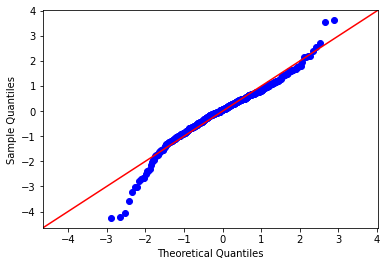

In [ ]:
# plotting a Q-Q plot as we are asked a question about it.

sm.qqplot((y_train - y_train_pred), fit=True, line='45')
plt.show()

This Q-Q Plot of error terms is showing a normal distribution

## Making Predictions Using The Final Model

### Rescaling The Features / Variables of TEST DATASET

    All the variables must be on the same scale for the model to be easily interpretable.
    We can use standardization or normalization (Min-Max scaling) for scaling.

So we will be performing Min-Max scaling as we used for Training dataset.

In [ ]:
# apply scaler() to all the columns with numeric values except the'dummy' variables

num_vars = ['feelingtemp','humidity','windspeed','count']
data_test[num_vars] = scaler.transform(data_test[num_vars])

In [ ]:
data_test.head()

,year,feelingtemp,humidity,windspeed,count,Spring,Summer,Winter,Workingday,Light Snow,...,May,Nov,Oct,Sep,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
184,0,0.769660,0.657364,0.084219,0.692706,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
535,1,0.842587,0.610133,0.153728,0.712034,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
299,0,0.496145,0.837699,0.334206,0.303382,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
221,0,0.795343,0.437098,0.339570,0.547400,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0.741471,0.314298,0.537414,0.569029,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


In [ ]:
# dividing the data into X and y

y_test = data_test.pop('count')
X_test = data_test

In [ ]:
# creating a copy of final dataset and dropping the column 'const' to get the column names

X_train_col = X_train_7.drop(["const"], axis = 1)
final_columns = X_train_col.columns
final_columns

Index(['year', 'feelingtemp', 'windspeed', 'Summer', 'Winter', 'Light Snow',
       'Mist + Cloudy', 'Aug', 'Sep'],
      dtype='object')

#### Using our model to make predictions.

In [ ]:
# Creating X_test_new dataframe by dropping variables from X_test

X_test_new = X_test[final_columns]

In [ ]:
# Adding a constant variable

X_test_new = sm.add_constant(X_test_new)

In [ ]:
# Making predictions
y_test_pred = lm7.predict(X_test_new)

## Model Evaluation

### Finding the R-squared and Adjusted R-Squared  value for Test dataset

In [ ]:
# R-square for test dataset

from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_test_pred)
r2

0.7923257919867839

In [ ]:
# Adjusted R-squared for test dataset
# adj r2 = 1-(1-R2)*(n-1)/(n-p-1)
# where, n = sample size , p = number of predictors

# number of rows in test dataset
n = X_test_new.shape[0]

# Number of features (predictors, p) is the shape along axis 1
p = X_test_new.shape[1]

adjusted_r2 =1-(1-r2)*(n-1)/(n-p-1)    # 1-(1-0.7923257919867839)*(220-1)/(220-10-1)
adjusted_r2

0.782389227010075

<Figure size 432x288 with 0 Axes>

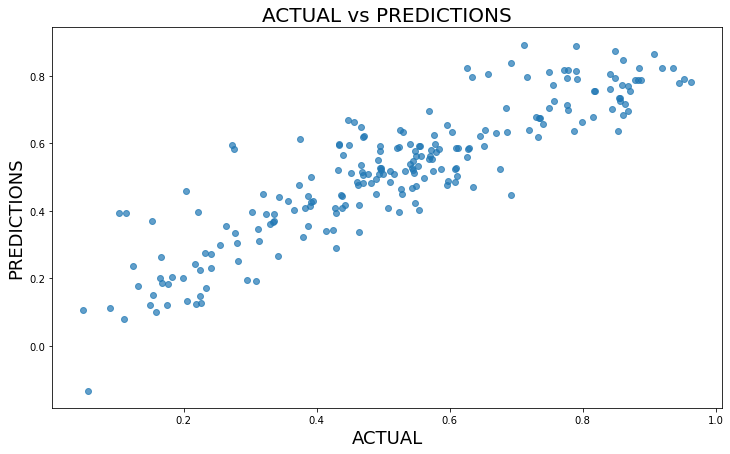

In [ ]:
# Plotting y_test and y_pred to understand the spread.
fig = plt.figure()
plt.figure(figsize=(12,7))
plt.scatter(y_test,y_test_pred,alpha=0.7)
plt.title('ACTUAL vs PREDICTIONS', fontsize=20)              # Plot heading
plt.xlabel('ACTUAL', fontsize=18)                          # X-label
plt.ylabel('PREDICTIONS', fontsize=18)
plt.show()

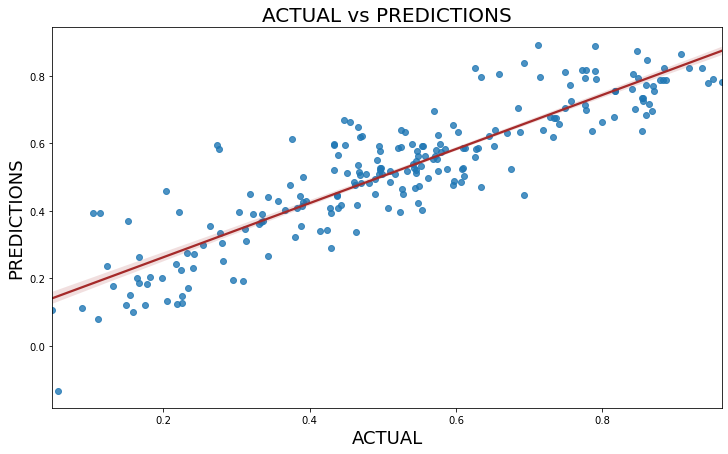

In [ ]:
#Regression plot
plt.figure(figsize=(12,7))
sns.regplot(x=y_test, y=y_test_pred, ci=68, fit_reg=True, line_kws={"color": "brown"})

plt.title('ACTUAL vs PREDICTIONS', fontsize=20)
plt.xlabel('ACTUAL', fontsize=18)
plt.ylabel('PREDICTIONS', fontsize=18)
plt.show()

## Insights shown by the coefficients

In [ ]:
lm7.params

const            0.122594
year             0.233702
feelingtemp      0.541229
windspeed       -0.133450
Summer           0.100507
Winter           0.130177
Light Snow      -0.271843
Mist + Cloudy   -0.080673
Aug              0.069353
Sep              0.118010
dtype: float64

const : The Constant value of ‘0.122594’ indicated that, in the absence of all other predictor variables, The bike rental can still increase by 0.122594 units

year : Coefficient value is ‘0.233702’ indicating that a unit increase in year, the number of bike rentals increases by 0.233702 units

feelingtemp : Coefficient value is ‘0.541229’ indicating that a unit increase in feelingtemp, the number of bike rentals increases by 0.541229 units

windspeed : Coefficient value is ‘-0.133450’ indicated that, a unit increase in windspeed, the number of bike rentals decreases by 0.133450 units

Summer : Coefficient value is ‘0.100507’ indicated that a unit increase in Summer, the number of bike rentals increases by 0.100507 units

Winter : Coefficient value is ‘0.130177’ indicated that a unit increase in Winter, the number of bike rentals increases by 0.130177 units

Aug : Coefficient value is ‘0.069353’ indicated that a unit increase in Aug, the number of bike rentals increases by 0.069353 units

Sep : Coefficient value is ‘0.118010’ indicated that a unit increase in Sep, the number of bike rentals increases by 0.118010 units

Light Snow : Coefficient value is ‘-0.271843’ indicated that, a unit increase in Light Snow, the number of bike rentals decreases by -0.271843 units

Misty + Cloudy: Coefficient value is ‘-0.080673’ indicated that a unit increase in Misty + Cloudy weathe, the number of bike rentals decreases by 0.080673 units

#### Temperature could be a prime factor for making decision for the Organisation

### The equation of best fitted line for our final model

count = 0.122594 + (year * 0.233702) + (feelingtemp * 0.541229) + (windspeed * -0.133450) + (Summer * 0.100507) + (Winter * 0.130177) + (Light Snow * -0.271843) + (Mist+Cloudy * -0.080673) + (Aug * 0.069353) + (Sep * 0.118010)